<a href="https://colab.research.google.com/github/nemyers/nicholasmyers.github.io/blob/master/SNR_Results_Figure_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello! Run this first cell to load packages you need. **To run a cell, click the round arrow button on the left.** A green tickmark will confirm that the code has run.

In [ ]:
# @title Load R packages for plotting
#Package names
packages <- c("ggplot2", "tidyr", "dplyr")
#Package loading
invisible(lapply(packages, library, character.only = TRUE))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Specify the **number of participants** and run the cell.

In [ ]:
# @title set number of participants
nparticipants <- 30 # @param {type:"integer"}
participant   = 1:nparticipants

Modify the next cell to fit your conditions

In [ ]:
# <-a hashtag turns a line into a comment - this is not executed as code
# use comments to annotate your code

#condition means
mean_active_lie          = 55
mean_sham_lie            = 62
mean_active_control_task = 68
mean_sham_control_task   = 70

#condition standard deviations
sd_active_lie          = 4
sd_sham_lie            = 3.5
sd_active_control_task = 3
sd_sham_control_task   = 3

#create individual particpants' data for each condition (by drawing from a normal distribution)
data_active_lie          = rnorm(nparticipants,mean_active_lie,sd_active_lie)
data_sham_lie            = rnorm(nparticipants,mean_sham_lie,sd_sham_lie)
data_active_control_task = rnorm(nparticipants,mean_active_control_task,sd_active_control_task)
data_sham_control_task   = rnorm(nparticipants,mean_sham_control_task,sd_sham_control_task)

#concatenate data from all four conditions into a long list
#will be concatenated in the following order: active TMS Lie, sham TMS Lie, active TMS control task, sham TMS control task
Accuracy = c(data_active_lie,data_sham_lie,data_active_control_task,data_sham_control_task)

#the accuracy list contains all participants' data from all conditions
#now make a list indicating for each data point whether it is from the lie task or the control task
Task = rep(c("Lie","Lie","Control","Control"), each=nparticipants)

#now make a list indicating for each data point whether it is from the active or sham TMS condition
TMS = rep(c("Active","Sham","Active","Sham"), each=nparticipants)

#now make a list indicating for each data point which participant it is from
Participant = rep(participant, times=4)

#concatenate all variables into a single data frame in long format
data <- data.frame(Participant, Task, TMS, Accuracy)

Set up some settings for your plot

In [ ]:
# @title now set up some plotting options
show_violin_plot <- FALSE # @param ["FALSE", "TRUE"] {type:"raw"}
show_individual_participants <- TRUE # @param ["TRUE", "FALSE"] {type:"raw"}
plottitle <- "TMS Effect on Lie Detection" # @param {type:"string"}
xlabel <- "Task" # @param {type:"string"}
ylabel <- "Accuracy (% correct)" # @param {type:"string"}
boxplot_on_dots <- FALSE # @param ["FALSE", "TRUE"] {type:"raw"}
plotcolor1 <- 0.8 # @param {type:"slider", min:0.05, max:0.95, step:0.05}
plotcolor2 <- 0.3 # @param {type:"slider", min:0.05, max:0.95, step:0.05}
labelsize <- 24 # @param {type:"integer"}
titlesize <- 36 # @param {type:"integer"}
dotsize <- 12 # @param {type:"number"}


#for each condition, add a new triplet of RGB values
plotcolors = c(rgb(plotcolor1,plotcolor1,plotcolor1),rgb(plotcolor2,plotcolor2,plotcolor2))
#plotcolors = c("#999999", "#E69F00")) #if you prefer you can specify colors as hex codes
#plotcolors = c("cornsilk2","cornsilk4") #or you can use R names

#resize plot
plotsize = 10
options(repr.plot.width =plotsize, repr.plot.height =plotsize)
axiswidth = 1.5 #

show_box_plot = TRUE
if (show_violin_plot){
  violin_alpha = 0.1
  violin_width = 0.5
} else {
  violin_alpha = 0.0
  violin_width = 0.0
}

if (show_box_plot){
  box_alpha = 0.85
} else {
  box_alpha = 0.0
}
if (boxplot_on_dots) {
  box_dodge = 1.2
} else {
  box_dodge = 0.8
}

if (show_individual_participants){
  dot_alpha = 0.5
} else {
  dot_alpha = 0.0
}

The next cell will create your plot

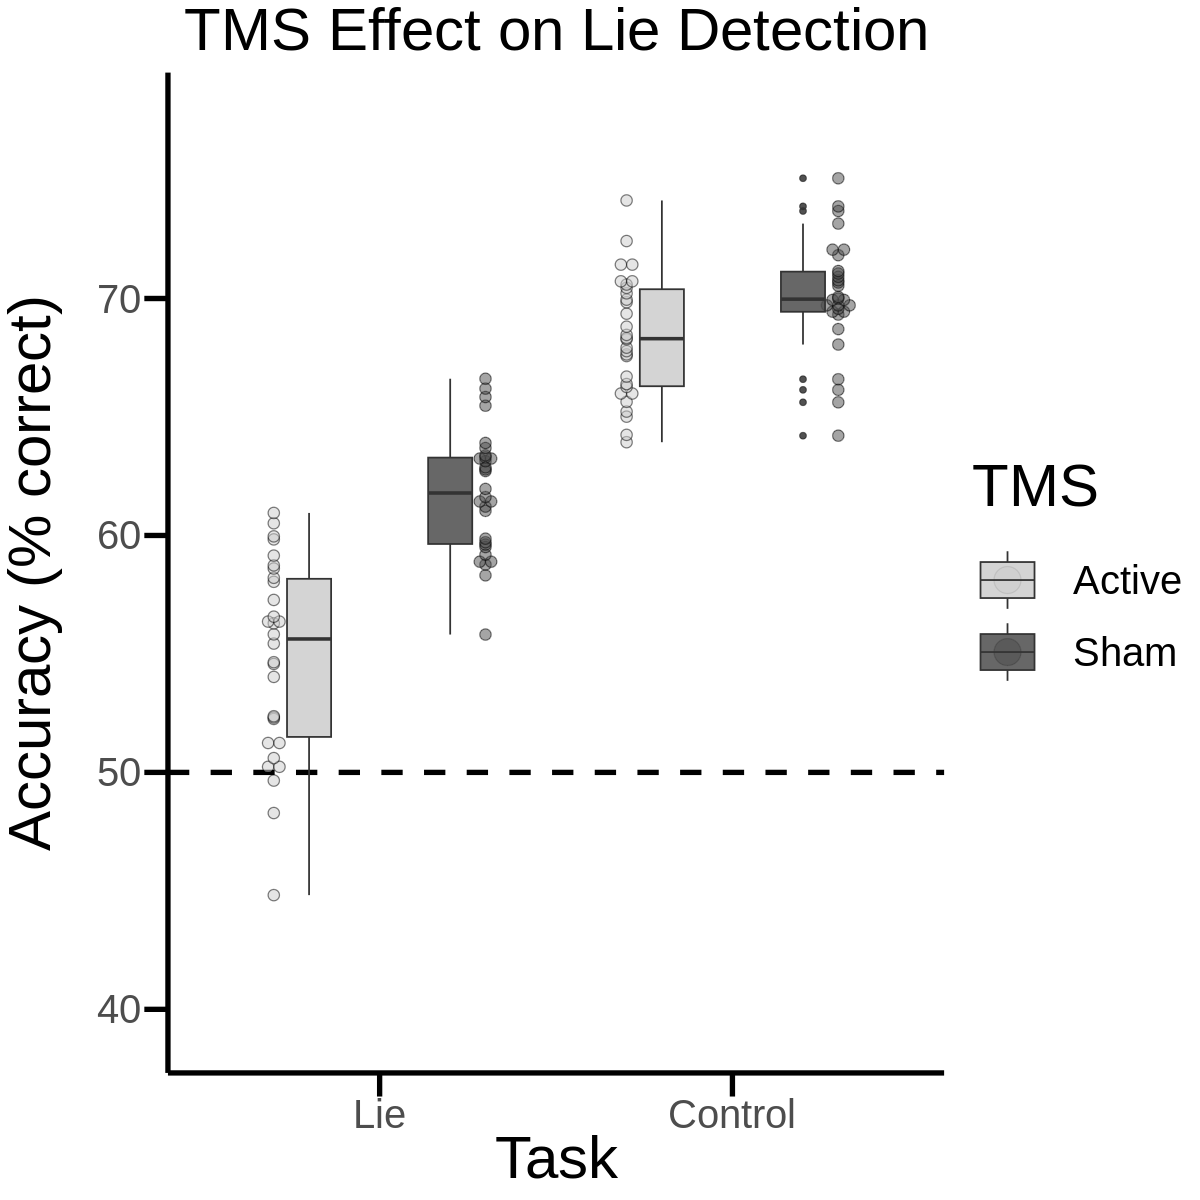

In [ ]:
#@title now create the plot!

#the next line specifies which data to plot
#in a 2x2 design, specify which dependent variable to plot on the y-axis (in our case: Accuracy),
#which independent variable to plot along the x-axis (in our case: Task condition),
#and which independent variable to plot with different colours/fills (in our case: TMS condition)

ggplot(data, aes(x=Task, y=Accuracy,fill=TMS)) + #make sure to add + if the plotting command continues into next line
  geom_hline(yintercept=50,linewidth=axiswidth,linetype='dashed')+#add a horizontal line at yintercept
  geom_violin(position=position_dodge(1.2),alpha=violin_alpha,trim=FALSE,linewidth=violin_width)+ #add violin plot?
  geom_dotplot(binaxis='y', stackdir='center', position=position_dodge(1.2),dotsize=dotsize,alpha=dot_alpha,binwidth=0.04)+ #add individual data points?
  geom_boxplot(position=position_dodge(box_dodge),width=0.25,alpha=box_alpha)+ #add boxplot
  scale_fill_manual(values=plotcolors)+#change colors
  labs(x=xlabel,y=ylabel,title=plottitle)+#set axis and plot labels
  scale_x_discrete(limits = c("Lie", "Control"))+#rearrange categorical variables on x-axis
  #below: make plot readable and clean
  theme_bw() +
  theme(plot.background = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank() )+
  theme(panel.border= element_blank())+
  theme(axis.line.x = element_line(color="black", linewidth = axiswidth),
        axis.line.y = element_line(color="black", linewidth = axiswidth))+
  theme(axis.ticks = element_line(colour = "black", linewidth = axiswidth))+
  theme(axis.ticks.length = unit(0.5,"cm"))+
  theme(axis.text = element_text(size = labelsize))+
  theme(axis.title = element_text(size = titlesize))+
  theme(axis.title.x = element_text(margin=margin(r=20)))+
  theme(axis.title.y = element_text(margin=margin(r=20)))+
  theme(legend.text = element_text(size = labelsize))+
  theme(legend.title = element_text(size = titlesize))+
  theme(legend.key.size = unit(3,"line"))+
  theme(plot.title = element_text(size = titlesize))+
  theme(plot.title = element_text(hjust = 0.5))